# Práctica 6 - Interpolación y cuadrados mínimos

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 3

Para cada uno de los conjuntos de datos, plantear las ecuaciones noramles y calcular los polinomios de grado 1, 2 y 3 que mejor aproximan a la tabla en el sentido de cuadrados mínimos. Graficar los datos junto con los 3 polinomios. ¿Qué se observa? ¿Qué se puede decir del polinomio de grado 3?

### Primer conjunto de datos

| <!-- --> | <!-- --> | <!-- --> | <!-- -->  | <!-- -->  |
|:-:|:--:|:-:|:--:|:--:|
| x | -1 | 0 | 2  | 3  |
| y | -1 | 3 | 11 | 27 |

Los cálculos que hice en papel me dicen que los polinomios son respectivamente:

$$y = \frac{32}{5}x + \frac{18}{5}\,,$$
$$y = 2x^2 + \frac{12}{5}x + \frac{3}{5}\,,$$
$$y = x^3 - x^2 + 2x + 3.$$

In [2]:
# Defino los conjuntos de datos
x = np.array([-1,0,2,3])
y = np.array([-1,3,11,27])

# Me describo los 3 polinomios
p1 = lambda x : 32/5 * x + 18/5
p2 = lambda x : 2* x**2 + 12/5 * x + 3/5
p3 = lambda x : x**3 - x**2 + 2*x + 3

# Agarro un espacio de puntos donde graficar, y obtengo las imagenes por los polinomios correspondientes
x_fit = np.linspace(-2, 4, 100)
y_fit1 = p1(x_fit)
y_fit2 = p2(x_fit)
y_fit3 = p3(x_fit)

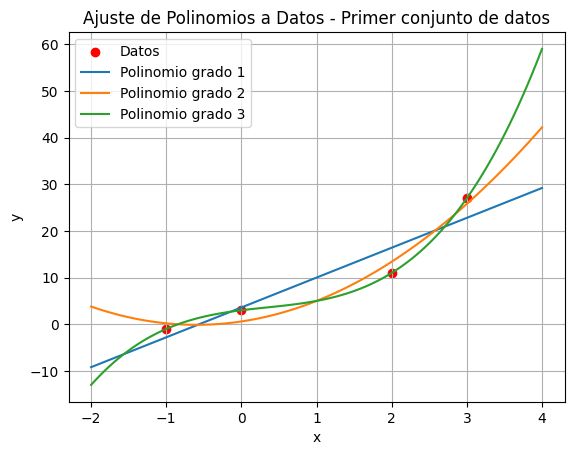

In [3]:
plt.scatter(x,y,label="Datos",color="red")
plt.plot(x_fit, y_fit1, label='Polinomio grado 1')
plt.plot(x_fit, y_fit2, label='Polinomio grado 2')
plt.plot(x_fit, y_fit3, label='Polinomio grado 3')
plt.title('Ajuste de Polinomios a Datos - Primer conjunto de datos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Observación: El polinomio de grado 3, interpola a los 3 puntos.

Para el resto de los datos, voy a calcularlos acá mismo

### Segundo conjunto de datos

| <!-- --> | <!-- --> | <!-- --> | <!-- -->  | <!-- -->  |
|:-:|:--:|:-:|:--:|:--:|
| x | -1 | 0 | 1 | 2  |
| y | -3 | 1 | 1 | 3 |

#### Ecuaciones para el polinomio de grado 1

Debo plantear para resolver el problema de cuadrados mínimos:

$$A^T A \beta = A^T y$$

donde $A$ para el grado $1$ será:

$$A = \begin{pmatrix}
1 & x_1 \\
1 & x_2 \\
1 & x_3 \\
1 & x_4 \\
\end{pmatrix}
=
\begin{pmatrix}
1 & -1 \\
1 & 0 \\
1 & 1 \\
1 & 2 \\
\end{pmatrix}
$$

In [4]:
unos = np.array([1,1,1,1])
x = np.array([-1,0,1,2])
y = np.array([-3,1,1,3])

A1 = np.vstack((unos,x)).T

In [5]:
betas = np.linalg.solve(A1.T@A1, A1.T @ y)
betas

array([-0.4,  1.8])

Luego la recta que mejor aproxima es $$y=1.8x-0.4$$

In [6]:
A2 = np.vstack((unos,x,x**2)).T
betas = np.linalg.solve(A2.T@A2, A2.T @ y)
betas

array([ 0.1,  2.3, -0.5])

Luego la parabola que mejor aproxima es $$y=-0.5x^2 + 2.3 x + 0.1$$

In [7]:
A3 = np.vstack((unos,x,x**2,x**3)).T
betas = np.linalg.solve(A3.T@A3, A3.T @ y)
betas

array([ 1.,  1., -2.,  1.])

Luego el polinomio cúbico que mejor aproxima es $$y=x^3-2x^2+x+1$$

In [8]:
# Me describo los 3 polinomios
p1 = lambda x : 1.8 * x - 0.4
p2 = lambda x : -0.5 * x**2 + 2.3 * x + 0.1
p3 = lambda x : x**3 - 2* x**2 + x + 1

# Agarro un espacio de puntos donde graficar, y obtengo las imagenes por los polinomios correspondientes
x_fit = np.linspace(-2, 4, 100)
y_fit1 = p1(x_fit)
y_fit2 = p2(x_fit)
y_fit3 = p3(x_fit)

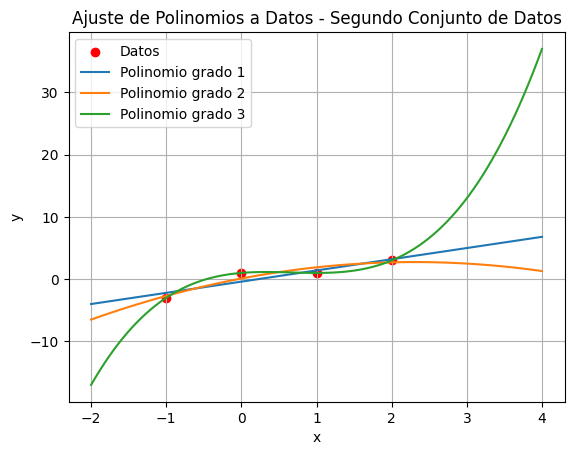

In [9]:
plt.scatter(x,y,label="Datos",color="red")
plt.plot(x_fit, y_fit1, label='Polinomio grado 1')
plt.plot(x_fit, y_fit2, label='Polinomio grado 2')
plt.plot(x_fit, y_fit3, label='Polinomio grado 3')
plt.title('Ajuste de Polinomios a Datos - Segundo Conjunto de Datos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Otra vez, el polinomio de grado 3 es perfecto. Esto es esperable, dado que si me das $N+1$ puntos, creo que siempre puedo encontrar un polinomio de grado $N$ que los interpole a todos.

## Ejercicio 5

Los siguientes datos corresponden a la población argentina (expresada en millones de habitantes)

| <!-- --> | <!-- --> | <!-- --> | <!-- -->  | <!-- -->  |<!-- -->  |<!-- -->  |
|:-:|:--:|:-:|:--:|:--:|:--:|:--:|
| Año | 1950 | 1960 | 1970 | 1980  | 1990 | 2000 |
| Habitantes (en millones) | 17 | 20.5 | 23.9 | 27.9 | 32.6 | 36.9 |

### Inciso a

Utilizando $\texttt{np.polyfit}$, hallar una función $f$ de la forma $f(x)=ax+b$ que mejor ajuste a los datos en el sentido de mínimos cuadrados. Graficar en una misma figura los datos y la función $f$.

In [10]:
x = np.array([1950,1960,1970,1980,1990,2000])
y = np.array([17,20.5,23.9,27.9,32.6,36.9])

beta_1, beta_0 = np.polyfit(x,y,1)
p1 = lambda x : beta_1 * x + beta_0

In [11]:
x_fit = np.linspace(1940,2010,100)
y_fit = p1(x_fit)

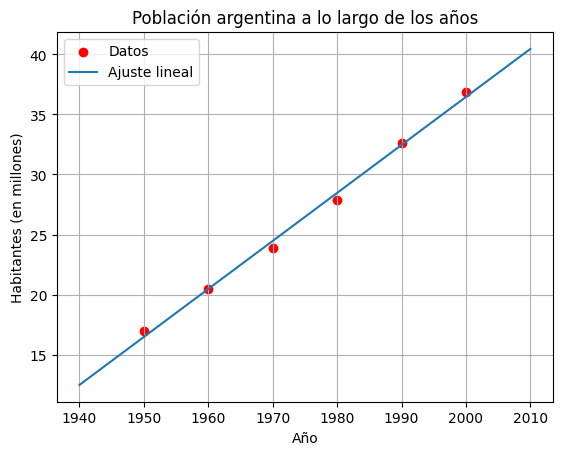

In [12]:
plt.scatter(x,y,label="Datos",color="red")
plt.plot(x_fit, y_fit, label='Ajuste lineal')
plt.title('Población argentina a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Habitantes (en millones)')
plt.legend()
plt.grid()
plt.show()

### Inciso b

Utilizando la función del ítem anterior, ¿qué población se puede inferir que había en Argentina en los años 1955, 1965, 1975, 1985 y 1995?

In [13]:
print("Población estimada de Argentina en el año 1955: ", p1(1955))
print("Población estimada de Argentina en el año 1965: ", p1(1965))
print("Población estimada de Argentina en el año 1975: ", p1(1975))
print("Población estimada de Argentina en el año 1985: ", p1(1985))
print("Población estimada de Argentina en el año 1995: ", p1(1995))

Población estimada de Argentina en el año 1955:  18.478095238095193
Población estimada de Argentina en el año 1965:  22.47238095238083
Población estimada de Argentina en el año 1975:  26.46666666666647
Población estimada de Argentina en el año 1985:  30.46095238095222
Población estimada de Argentina en el año 1995:  34.45523809523786


### Inciso c

La población $\textit{real}$ de la Argentina en los años del ítem anterior era de $18.8$, $22.2$, $25.9$, $30.2$ y $34.8$ millones de habitantes respectivamente. Calcular el error que se cometió al inferir la población de estos años a partir del ajuste del item (a). Volver a graficar la función $f$ del ítem (a), incorporando (en otro color) los nuevos datos.

In [14]:
años_extra = np.array([1955,1965,1975,1985,1995])
p_real = np.array([18.8,22.2,25.9,30.2,34.8])

print("Error cometido al inferir la población con el ajuste lineal en 1955", p1(1955)-p_real[0])
print("Error cometido al inferir la población con el ajuste lineal en 1965", p1(1965)-p_real[1])
print("Error cometido al inferir la población con el ajuste lineal en 1975", p1(1975)-p_real[2])
print("Error cometido al inferir la población con el ajuste lineal en 1985", p1(1985)-p_real[3])
print("Error cometido al inferir la población con el ajuste lineal en 1995", p1(1995)-p_real[4])

Error cometido al inferir la población con el ajuste lineal en 1955 -0.32190476190480766
Error cometido al inferir la población con el ajuste lineal en 1965 0.27238095238083204
Error cometido al inferir la población con el ajuste lineal en 1975 0.566666666666471
Error cometido al inferir la población con el ajuste lineal en 1985 0.2609523809522223
Error cometido al inferir la población con el ajuste lineal en 1995 -0.3447619047621373


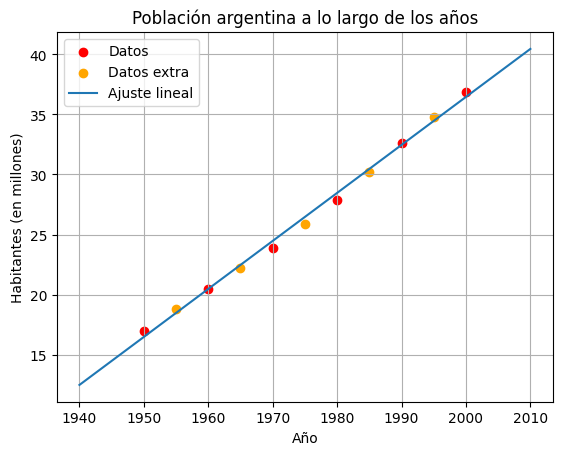

In [15]:
plt.scatter(x,y,label="Datos",color="red")
plt.scatter(años_extra,p_real,label="Datos extra",color="orange")
plt.plot(x_fit, y_fit, label='Ajuste lineal')
plt.title('Población argentina a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Habitantes (en millones)')
plt.legend()
plt.grid()
plt.show()

#### Inciso d

¿Considera que la inferencia del ítem (b) es razonablemente buena?

Sí.

### Ejercicio 7

Interpolar la siguiente función en $n+1$ puntos equiespaciados en el intervalo $[-1,1]$

$$f(x)=\frac{1}{1+25x^2}$$

Graficar simultáneamente la función con sus respectivos interpoladores $p_n$ para $n=5,10,15$. 

Para valores altos de $n$, ¿mejora o empeora la aproximación?. Calcular $\|f-p_n\|_{\infty}$

In [16]:
def interpolador(f,inicio,fin,n):
    x = np.linspace(inicio,fin,n+1)
    y = f(x)

    betas = np.polyfit(x,y,n)
    return betas

In [17]:
f = lambda x :  1 / (1+25*x**2)
betas_5 = interpolador(f,-1,1,5)
betas_10 = interpolador(f,-1,1,10)
betas_25 = interpolador(f,-1,1,25)

In [18]:
x = np.linspace(-1,1,100)
y = f(x)
y1 = np.polyval(betas_5,x)
y2 = np.polyval(betas_10,x)
y3 = np.polyval(betas_25,x)

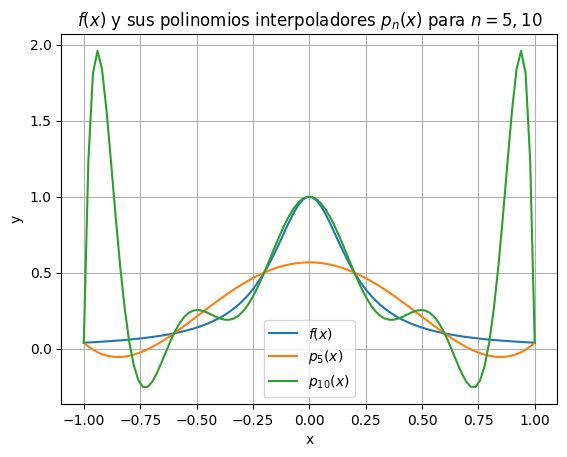

In [19]:
plt.plot(x,y,label=r"$f(x)$")
plt.plot(x,y1,label="$p_5(x)$")
plt.plot(x,y2,label="$p_{10}(x)$")
plt.title(r'$f(x)$ y sus polinomios interpoladores $p_n(x)$ para $n=5,10$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

$p_{10}(x)$ le pega en más puntos, pero también le erra por mucho en otras zonas. $p_5(x)$ parecería ser la mejor opción entre estas.

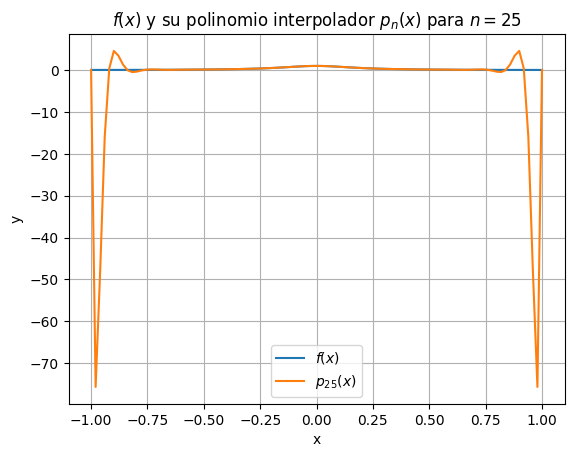

In [20]:
plt.plot(x,y,label=r"$f(x)$")
plt.plot(x,y3,label="$p_{25}(x)$")
plt.title(r'$f(x)$ y su polinomio interpolador $p_n(x)$ para $n=25$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Grafique $p_{25}(x)$ por separado porque si no ni dejaba apreciar las otras, de lo desastrosa que es. Como esperabamos, no mejora la aproximación para $n$ grande, simplemente overfiteas un montón.

Calculemos $\|f-p_n\|_{\infty}$ para $n=5,10,25$

In [21]:
dif_p5 = lambda x : f(x) - np.polyval(betas_5,x)
dif_p10 = lambda x : f(x) - np.polyval(betas_10,x)
dif_p25 = lambda x : f(x) - np.polyval(betas_25,x)

y_dif_p5 = np.abs(dif_p5(x))
y_dif_p10 = np.abs(dif_p10(x))
y_dif_p25 = np.abs(dif_p25(x))

print("La norma infinito de f-p_5 es: ", np.max(y_dif_p5))
print("La norma infinito de f-p_10 es: ", np.max(y_dif_p10))
print("La norma infinito de f-p_25 es: ", np.max(y_dif_p25))

La norma infinito de f-p_5 es:  0.43032461596244886
La norma infinito de f-p_10 es:  1.9154342696800037
La norma infinito de f-p_25 es:  75.73224036122816


## Ejercicio 8

Considerar los datos del ejercicio 5.

Se quiere aproximar los datos con una funcion $g$ de la forma $g(x)=e^{p(x)}$ con $p$ un polinomio. Linealizar el problema y calcular el polinomio de grado $5$ que interpola los datos.

Imprimir el polinomio en pantalla. ¿Observa algo llamativo? ¿Qué grado diría que tiene el polinomio?

Repetir el ajuste usando $p$ de grado 1. Graficar.

-----

Para linealizar el problema, considero una función $\ln(g(x)) = p(x)$, de esta manera, debo tomar logaritmo natural de los datos, que ahora se convierten en:

| <!-- --> | <!-- --> | <!-- --> | <!-- -->  | <!-- -->  |<!-- -->  |<!-- -->  |
|:-:|:--:|:-:|:--:|:--:|:--:|:--:|
| Año | 1950 | 1960 | 1970 | 1980  | 1990 | 2000 |
| Habitantes (en millones) | $17$ | $20.5$ | $23.9$ | $27.9$ | $32.6$ | $36.9$ |
| Logaritmo natural de los Habitantes (en millones) | $\ln(17)$ | $\ln(20.5)$ | $\ln(23.9)$ | $\ln(27.9)$ | $\ln(32.6)$ | $\ln(36.9)$ |

In [22]:
x = np.array([1950,1960,1970,1980,1990,2000])
y = np.array([17,20.5,23.9,27.9,32.6,36.9])
y_log = np.log(y)

betas = np.polyfit(x,y_log,5)

In [23]:
betas

array([ 2.53613021e-10, -2.64562924e-06,  1.10078552e-02, -2.28415292e+01,
        2.36429575e+04, -9.76818498e+06])

Vemos que los coficientes de grados $4$ y $5$ son insignificantes, mientras que el de grado $3$ no es muy grande. Podríamos argumentar que el polinomio es de prácticamente grado $3$ o $2$. Aparte observemos que la ordenada al origen es un número enorme rarísimo. Acá hay un gran problema de overfitear.

In [24]:
betas = np.polyfit(x,y_log,1)
betas

array([ 1.54897185e-02, -2.73507495e+01])

In [25]:
p1 = lambda x : np.polyval(betas,x)

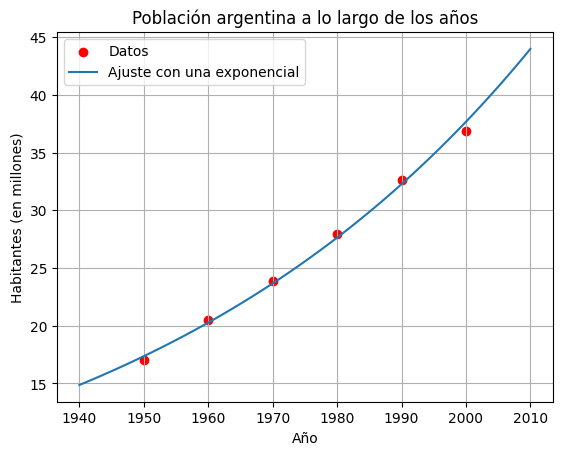

In [26]:
x_fit = np.linspace(1940,2010,100)
y_fit = np.e ** p1(x_fit)

plt.scatter(x,y,label="Datos",color="red")
plt.plot(x_fit, y_fit, label='Ajuste con una exponencial')
plt.title('Población argentina a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Habitantes (en millones)')
plt.legend()
plt.grid()
plt.show()

## Ejercicio 9

Supongamos que se deja caer un objeto desde una altura de $200$ m. Mientras caer, se toman las siguientes mediciones:

| <!-- --> | <!-- --> | <!-- --> | <!-- -->  | <!-- -->  |<!-- -->  |
|:-:|:--:|:-:|:--:|:--:|:--:|
| Tiempo (segundos) | $0$ | $1$ | $2$ | $4$  | $6$ |
| Altura (metros) | $200$ | $195$ | $180$ | $120$ | $25$ |

Se quiere aproximar los datos en el sentido de cuadrados mínimos con una función de la forma $f(t)=at^2+b$

### Inciso a

Escribir la matriz del problema. ¿Se puede usar el comando $\texttt{np.polyfit}$ con grado $2$ para realizar el ajuste? ¿Qué se podría hacer para poder usar $\texttt{np.polyfit}$?

----

La matriz del problema es $$A = \begin{pmatrix}
1 & t_1^2 \\
1 & t_2^2 \\
1 & t_3^2 \\
1 & t_4^2 \\
1 & t_5^2 \\
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 \\
1 & 1 \\
1 & 4 \\
1 & 16 \\
1 & 36 \\
\end{pmatrix}$$

No podemos usar directamente $\texttt{np.polyfit}$, pero podemos ser vivos. Hagamoslo de ambas maneras para chequear que da lo mismo

In [27]:
t = np.array([0,1,2,4,6])
h = np.array([200,195,180,120,25])

unos = np.ones(5)
A = np.vstack((unos,t**2)).T
A

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  4.],
       [ 1., 16.],
       [ 1., 36.]])

In [28]:
betas = np.linalg.solve(A.T @ A, A.T @h)
betas

array([199.47454308,  -4.86618799])

Bien, ahora con mi truquito, que va a ser elevar al cuadrado los datos y hacer un modelo lineal con eso, nos deberia dar lo mismo

In [29]:
betas = np.polyfit(t**2,h,1)
betas

array([ -4.86618799, 199.47454308])

<img src="https://pbs.twimg.com/media/FvsA5aZX0AA7VJX?format=jpg&name=large" width="150"/>

### Inciso b

Sabiendo que la altura de dicho objeto despues de haber transcurrido un tiempo $t$ viene dada por $f(t)=200-\frac{1}{2}gt^2$, determinar el valor aproximado de $g$

----

Despejando, podemos ver que si $-\frac{1}{2}gt^2 = \beta_2 t^2$, entonces, $g \approx -2\beta_2$

In [30]:
g = -2 * betas[0]
print("El valor aproximado de aceleración dada por la gravedad es: ", g, "m/s^2")

El valor aproximado de aceleración dada por la gravedad es:  9.732375979112273 m/s^2


## Ejercicio 10

En cierta especie animal se estudia la relación entre el peso $X$ (en kg) y el volumen pulmonar $Y$ (en litros), obteniéndose los datos:

| <!-- --> | <!-- --> | <!-- --> | <!-- -->  | <!-- -->  |<!-- -->  |
|:-:|:--:|:-:|:--:|:--:|:--:|
| Peso (kg) | $60$ | $85$ | $100$ | $150$  | $250$ |
| Volumen pulmonar (l) | $2.3$ | $4$ | $5$ | $9$ | $19.5$ |


### Inciso a

Ajustar los datos a una función $Y=aX^b$ en el sentido de cuadrados mínimos

---

Por supuesto, como ese modelo no es lineal, y estamos en ALC, debemos linealizarlo:

$$\log(Y) = \log(aX^b) = \log(a) + \log(X^b) = \log(a) + b \log(X)$$

Y si definimos $Y'=\log(Y)$, $X'=\log(X)$, $a' = \log(a)$ resulta

$$Y'= a' + b X'$$

Tomaremos, entonces, logaritmo en los datos (tanto en los pesos como en los volumenes).

In [31]:
pesos = np.array([60,85,100,150,250])
volumenes = np.array([2.3,4,5,9,19.5])

pesos_log = np.log(pesos)
volumenes_log = np.log(volumenes)

b, a_prime = np.polyfit(pesos_log, volumenes_log,1)
a = np.e ** a_prime

In [32]:
f = lambda x : a* x**b

### Inciso b

Graficar.

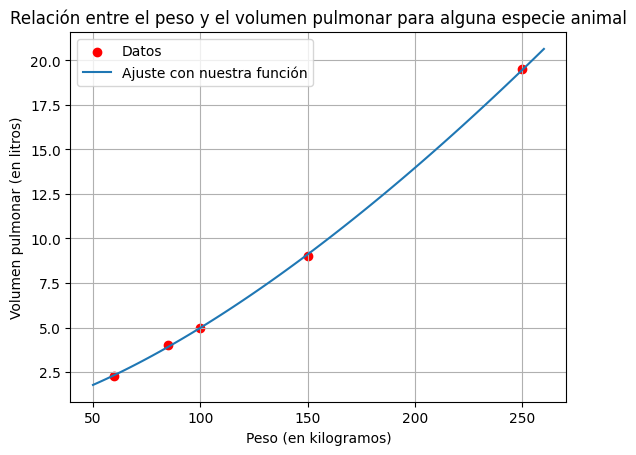

In [33]:
x_fit = np.linspace(50,260,100)
y_fit = f(x_fit)

plt.scatter(pesos,volumenes,label="Datos",color="red")
plt.plot(x_fit, y_fit, label='Ajuste con nuestra función')
plt.title('Relación entre el peso y el volumen pulmonar para alguna especie animal')
plt.xlabel('Peso (en kilogramos)')
plt.ylabel('Volumen pulmonar (en litros)')
plt.legend()
plt.grid()
plt.show()

### Inciso c

Predecir el volumen pulmonar de un individuo cuyo peso es de $93$kg.

In [34]:
print("El volumen pulmonar que predice mi modelo para un individuo de 93kg de nuestra especie es: ", f(93))

El volumen pulmonar que predice mi modelo para un individuo de 93kg de nuestra especie es:  4.474968599568629


## Ejercicio 11

Implementar un programa que reciba como input una lista de funciones $\{f_1,\dots,f_m\}$ y dos vectores $x=(x_1,\dots,x_n)$, $y=(y_1,\dots,y_n)$ y calcule la función

$$f=\sum_{i=1}^{m} \alpha_i f_i(x)$$

que mejor aproxime los datos en el sentido de cuadrados mínimos.

---

Lo que queremos resolver es $$\min_{\alpha} \|y-\sum_{i=1}^{m} \alpha_i f_i(x)\|_2^2$$, y sabemos que es equivalente a $F\alpha = y$

donde $F=\begin{pmatrix}
f_1(x_1) & f_2(x_1) & \dots & f_m(x_1) \\
f_1(x_2) & f_2(x_2) & \dots & f_m(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
f_1(x_n) & f_2(x_n) & \dots & f_m(x_n) \\
\end{pmatrix}$,$\alpha= \begin{pmatrix}
\alpha_1 \\
\alpha_2\\
\vdots  \\
\alpha_n \\
\end{pmatrix}$, $y= \begin{pmatrix}
y_1 \\
y_2\\
\vdots  \\
y_n \\
\end{pmatrix}$, y nuestra incógnita es, por supuesto $\alpha$.

Fijense que esto es decir $$y_i = f_1(x_i) + f_2(x_i) +\dots+f_m(x_i)= \sum_{j=0}^{m}f_j(x_i) $$ para todo $i$ entre $1$ y $n$.

In [35]:
def ajustar(funciones,x,y):
    m = len(funciones)

    assert len(x) == len(y)
    n = len(x)

    F = np.zeros((n,m))

    # Lleno a la matriz por columnas
    for i in range(m):
        F[:, i] = funciones[i](x)

    alphas, _ , _ , _  = np.linalg.lstsq(F,y,rcond=None)
    return alphas

## Ejercicio 12

En  el archivo $\texttt{humedad.csv}$ contiene los datos (simulados) de porcentaje de humedad diaria de Buenos Aires en 2020. Como los datos de humedad muestran periodicidad anual, se propone un modelo

$$ f(t) = c_1 + c_2\sin(t \frac{2\pi}{366}) + c_3 \sin(t \frac{4\pi}{366})$$

Utilizando el programa del ejercicio 11, hallar los coeficientes $c_1,c_2,c_3$ que mejor ajustan a los datos en el sentido de cuadrados mínimos. Graficar la función obtenida junto con los datos.

In [36]:
import pandas as pd

In [37]:
humedad = pd.read_csv("./humedad.csv")
display(humedad)

t    humedad
0      1  80.334616
1      2  80.249820
2      3  80.448725
3      4  80.730281
4      5  80.940629
..   ...        ...
361  362  79.897607
362  363  79.763707
363  364  80.020422
364  365  80.050444
365  366  80.125403

[366 rows x 2 columns]

In [38]:
# Extraigo los datos como vectores
t = humedad['t'].values
humedad = humedad['humedad'].values

In [39]:
# Defino las 3 funciones
funciones = [
    lambda t: 1, 
    lambda t: np.sin(t * 2 * np.pi / 366),  
    lambda t: np.sin(t * 4 * np.pi / 366)   
]

In [40]:
# Calculo los coeficientes que minimizan según mínimos cuadrados
coeficientes = ajustar(funciones, t, humedad)

In [41]:
# Defino una función para el modelo
modelo_humedad = lambda t : coeficientes[0] + coeficientes[1] * np.sin(t * 2 * np.pi / 366) + coeficientes[2] * np.sin(t * 4 * np.pi / 366)

In [42]:
humedad_ajustada = modelo_humedad(t)

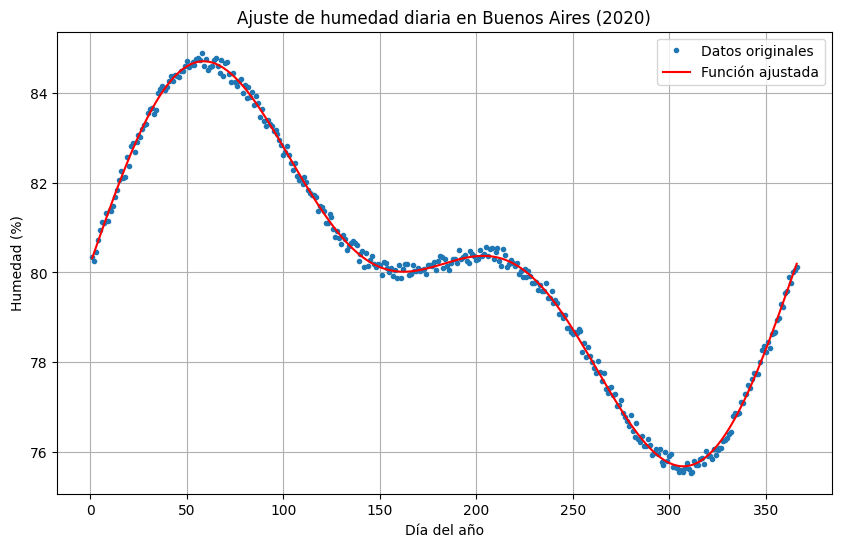

In [46]:
# Graficamos los datos originales y la función que ajustamos
plt.figure(figsize=(10, 6))
plt.plot(t, humedad, 'o', label='Datos originales', markersize=3)
plt.plot(t, humedad_ajustada, label='Función ajustada', color='red')
plt.xlabel('Día del año')
plt.ylabel('Humedad (%)')
plt.title('Ajuste de humedad diaria en Buenos Aires (2020)')
plt.legend()
plt.grid(True)
plt.show()

## Ejercicio 13

En el archivo $\texttt{infantesConBajoPesoAlNacer.txt}$ se encuentran los datos correspondientes a mediciones de 100 niños nacidos con bajo peso en Boston (Labor and deliver characteristics and the risk of germinal matrix hemorrage in low birth weight infants. Journal of child neurology, 6(1), 35-40, (1991))

Llamamos

* $Y=$ perímetro cefálico del bebé al nacer, en centímetros (columna headcirc).
* $X_1=$ edad gestacional del bebé al nacer, en semanas (columna gestage).
* $X_2=$ peso al nacer del bebé, en gramos (columna birthwt)

Se quiere predecir el perímetro cefálico de un niño al nacer.

### Inciso a

Graficar $X_1$ vs $Y$ y $X_2$ vs $Y$. ¿Qué tipo de relación observa en cada caso?

In [47]:
infantes = pd.read_csv('infantesConBajoPesoAlNacer.txt')
display(infantes)

headcirc   length   gestage   birthwt   momage   toxemia
0         27       41        29      1360       37         0
1         29       40        31      1490       34         0
2         30       38        33      1490       32         0
3         28       38        31      1180       37         0
4         29       38        30      1200       29         1
..       ...      ...       ...       ...      ...       ...
95        26       37        31       820       30         1
96        27       40        29      1150       28         0
97        28       35        32       880       35         1
98        28       41        33      1320       36         1
99        26       38        28      1080       36         0

[100 rows x 6 columns]

In [54]:
# El dataset viene con un espacio en la columna gestage, para joder
infantes = infantes.rename(columns = lambda x:str.strip(x))

In [57]:
y = infantes['headcirc']
x1 = infantes['gestage']
x2 = infantes['birthwt']

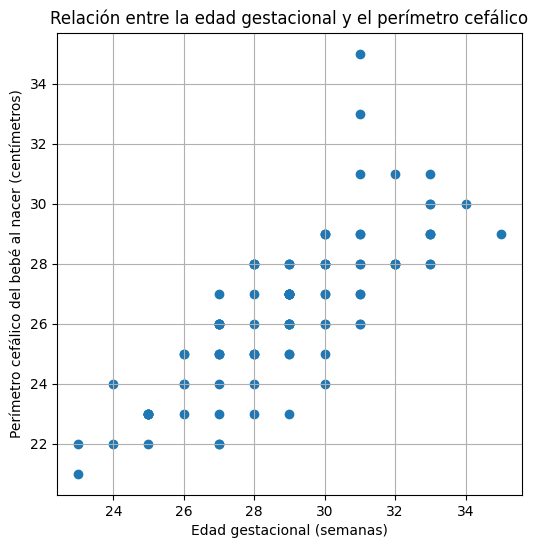

In [59]:
plt.figure(figsize=(6, 6))
plt.scatter(x1, y)
plt.xlabel('Edad gestacional (semanas)')
plt.ylabel('Perímetro cefálico del bebé al nacer (centímetros)')
plt.title('Relación entre la edad gestacional y el perímetro cefálico')
plt.grid(True)
plt.show()

Vemos que hay una correlación positiva entre las variables $X_1$ e $Y$

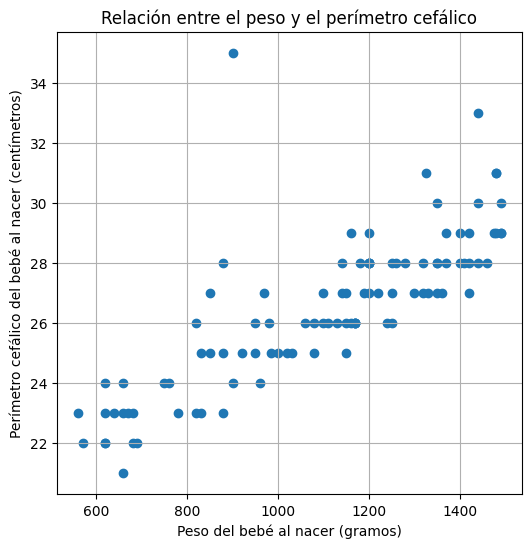

In [60]:
plt.figure(figsize=(6, 6))
plt.scatter(x2, y)
plt.xlabel('Peso del bebé al nacer (gramos)')
plt.ylabel('Perímetro cefálico del bebé al nacer (centímetros)')
plt.title('Relación entre el peso y el perímetro cefálico')
plt.grid(True)
plt.show()

Acá también observamos una correlación positiva entre $X_2$ e $Y$

### Inciso b

Plantear un modelo de regresión lineal para predecir el perimetro cefálico del bebé en función de su edad gestacional.

In [72]:
beta_1,beta_0 = np.polyfit(x1,y,1)
print("El modelo obtenido es: Y =", beta_1, "X1 + ", beta_0)

El modelo obtenido es: y = 0.7800531622076474 x +  3.9142641438210797


### Inciso c

Plantear un modelo de regresión lineal múltiple para predecir el perimetro cefálico del bebé en función de su edad gestacional y de su peso al nacer.

In [66]:
from sklearn.linear_model import LinearRegression

In [68]:
X = infantes[['gestage','birthwt']]
modelo = LinearRegression().fit(X,y)

In [69]:
modelo.coef_

array([0.44873285, 0.00471228])

In [70]:
modelo.intercept_

8.308015387654688

In [73]:
print("El modelo obtenido es: Y =", modelo.coef_[0], "X1 + ",modelo.coef_[1], "X2 + ", modelo.intercept_)

El modelo obtenido es: Y = 0.448732848130915 X1 +  0.004712283414336057 X2 +  8.308015387654688


### Inciso d

Si en el modelo obtenido en el ítem anterior mantenemos constante la edad gestacional, ¿cuántos centímetros de aumento en su perímetro cefálico, en promedio, se corresponde a cada incremento del peso en 10 gramos?

In [74]:
print("El aumento promedio del perímetro cefálico por cada incremento del peso en 10 gramos es: ", modelo.coef_[1]*10, " cm") 

El aumento promedio del perímetro cefálico por cada incremento del peso en 10 gramos es:  0.04712283414336057  cm


## Ejercicio 14

El ejercicio 17 muestra que la interpolación con polinomios de grado alto puede ser mala idea. Una alternativa puede ser la de interpolar a trozos por polinomios de bajo grado (por ejemplo, lineales). Esta idea tiene múltiples aplicaciones de las que aquí veremos un ejemplo:

Considerar una función $f:[a,b]\rightarrow\mathbb{R}$ y una particion uniforme del intervalo: $a=x_0 < x_1 < \dots < x_n =b$, con $x_i = a + ih, h=\frac{b-a}{n}$

### Inciso a

Escribir en términos de $x_i, x_{i+1}$ y $f$ la fórmula de una lineal que interpole a $f$ en $x_i$ y $x_i+1$, (llamémosla $p_i$).

---

Calculando simplemente la recta que conecta a dos puntos, y recordando que definimos $h$ como $x_{i+1}-x_i = \frac{b-a}{n}$, vemos que 

$$p_i(x) = f(x_i) + \frac{f(x_{i+1})-f(x_i)}{h} (x-x_i)$$

### Inciso b

Calcular de manera exactas la integral:

$$ \int_{x_i}^{x_{i+1}} p_i(x) dx$$

---

Hago acá el desarrollo:

$$\int_{x_i}^{x_{i+1}}p_i(x)dx = \int_{x_i}^{x_{i+1}} f(x_i) + \frac{f(x_{i+1})-f(x_i)}{h} (x-x_i) dx$$

Lo primero es fácil porque es una constante, queda:

$$=f(x_i)h + \int_{x_i}^{x_{i+1}}\frac{f(x_{i+1})-f(x_i)}{h} (x-x_i) dx$$

Acá, por simplicidad, voy a hacer un cambio de variables $u=x-x_i$ y resulta:

$$=f(x_i)h + \int_{0}^{h}\frac{f(x_{i+1})-f(x_i)}{h} u du$$

De donde ya se ve claramente que queda:

$$= f(x_i)h + \frac{f(x_{i+1})-f(x_i)}{h} \frac{h^2}{2}$$

Por tanto, resulta:

$$\int_{x_i}^{x_{i+1}} p_i(x) \, dx = h \left( f(x_i) + \frac{f(x_{i+1}) - f(x_i)}{2} \right)$$

$$\boxed{
\int_{x_i}^{x_{i+1}} p_i(x) \, dx = h \left(\frac{f(x_{i+1}) + f(x_i)}{2} \right)
}
$$

### Inciso c

Mostrar que $I = \int\limits_{a}^{b} f(x)dx$ puede aproximarse por la fórmula:

$$ I \sim \frac{b-a}{n} \left[ \frac{f(a)+f(b)}{2} + \sum_{i=1}^{n-1} f(x_i) \right]$$

Esta aproximación se conoce como $\textit{regla de trapecios compuesta}$

---

La idea es que podemos aproximar a $I$ como $$I \approx \sum_{i=0}^{n-1} \int_{x_i}^{x_{i+1}} p_i(x) \,.$$

Luego, veamos que, por (c) esto equivale a $$=\sum_{i=0}^{n-1} h \left(\frac{f(x_{i+1}) + f(x_i)}{2} \right) $$

que podemos simplificar a $$=\frac{h}{2} \left( \sum_{i=0}^{n-1} f(x_{i+1}) + f(x_i) \right) $$

Donde, sacando el primer término de la sumatoria, vemos que:
$$=\frac{h}{2} \left(f(a)+f(x_1) + \sum_{i=1}^{n-1} f(x_{i+1}) + f(x_i) \right) $$

Acá, haciendo un cambio de indice en la sumatoria correspondiente a $f(x_{i+1})$ vemos:
$$=\frac{h}{2} \left(f(a)+f(b) + \sum_{i=1}^{n-1} f(x_i) + \sum_{i=1}^{n-1} f(x_i) \right)$$
$$=\frac{h}{2} \left(f(a)+f(b) +2\sum_{i=1}^{n-1} f(x_i) \right)$$

Con lo que, simplificando, llegamos a:
$$=h \left(\frac{f(a)+f(b)}{2} \sum_{i=1}^{n-1} f(x_i) \right)\,,$$
y acá recordando que $h=\frac{b-a}{n}$, resulta:

$$\textbf{Regla de trapecios compuesta}$$
$$\boxed{ \int_{a}^{b} f(x)dx \approx \frac{b-a}{n} \left[ \frac{f(a)+f(b)}{2} + \sum_{i=1}^{n-1} f(x_i) \right]}$$





### Inciso d

Implementar una función que reciba una función $f$, un intervalo $[a,b]$ y un valor (opcional) $n$ y aproxime la integral a través de la fórmula de trapecios compuesta con $n+1$ nodos. \[Para pensar: ¿se puede vectorizar esta operación de modo de no aplicar un for\]

In [109]:
# Version naif
def integral(f,a,b,n=100000):
    x = np.linspace(a,b,n+1)

    suma = (f(a)+f(b))/2

    for i in range(1,n):
        suma += f(x[i])

    return (b-a)/n * suma

In [110]:
# Version "vectorizada"
def integral_posta(f,a,b,n=100000):
    x = np.linspace(a,b,n+1)

    suma = (f(a)+f(b))/2 + np.sum(f(x[1:n]))

    return (b-a)/n * suma

### Inciso e
Calcular las siguientes integrales (usando distintos valores de $n$) y comparar el resultado obtenido con el valor exacto:

#### i.
$$\int_{0}^{\frac{\pi}{2}} \sin(x)dx = 1$$

In [111]:
f = lambda x : np.sin(x)
print("La integral de 0 a pi/2 de sen(x) es: ", integral(f,0,np.pi/2))
print("La integral de 0 a pi/2 de sen(x) es: ", integral_posta(f,0,np.pi/2))

La integral de 0 a pi/2 de sen(x) es:  0.9999999999794397
La integral de 0 a pi/2 de sen(x) es:  0.999999999979438


#### ii.
$$\int_{0}^{2\pi} \cos(2x)dx = 0$$

In [112]:
f = lambda x : np.cos(2*x)
print("La integral de 0 a pi/2 de sen(x) es: ", integral(f,0,2*np.pi))
print("La integral de 0 a pi/2 de sen(x) es: ", integral_posta(f,0,2*np.pi))

La integral de 0 a pi/2 de sen(x) es:  -1.1021106394747594e-15
La integral de 0 a pi/2 de sen(x) es:  -8.85751180806288e-16


#### iii.
$$\int_{-1}^{1} \frac{1}{1+x^2}dx = \frac{\pi}{2}$$

In [121]:
f = lambda x : 1/(1+x**2)
print("La integral de 0 a pi/2 de sen(x) es: ", integral(f,-1,1))
print("La integral de 0 a pi/2 de sen(x) es: ", integral_posta(f,-1,1))

La integral de 0 a pi/2 de sen(x) es:  1.5707963267615657
La integral de 0 a pi/2 de sen(x) es:  1.5707963267615634


#### iv.
$$\int_{0}^{1} e^x dx = e-1$$

In [123]:
f = lambda x : np.e**x
print("La integral de 0 a pi/2 de sen(x) es: ", integral(f,0,1))
print("La integral de 0 a pi/2 de sen(x) es: ", integral_posta(f,0,1))

La integral de 0 a pi/2 de sen(x) es:  1.718281828473365
La integral de 0 a pi/2 de sen(x) es:  1.7182818284733645
